In [5]:
from torch.distributions import Normal
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl

In [57]:
posterior = Normal(0.4, 0.2)
proposal = torch.zeros(1000)
proposal[200:950] = 0.1
proposal[300:900] = 0.2
proposal[350:800] = 0.3
x_vals = torch.linspace(-2, 2, 1000)
y_vals = torch.exp(posterior.log_prob(x_vals))

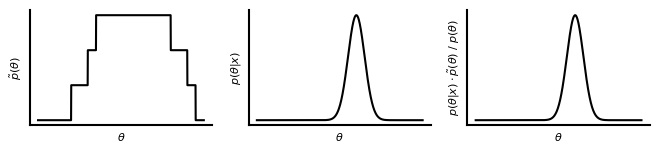

In [63]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 3, figsize=(8, 1.5))
    ax[0].plot(proposal.numpy(), c="k")
    ax[0].set_xticks([])
    ax[0].set_ylabel(r"$\tilde{p}(\theta)$")
    ax[0].set_yticks([])
    ax[0].set_xlabel(r"$\theta$")
    ax[1].plot(y_vals.numpy(), c="k")
    ax[1].set_xticks([])
    ax[1].set_ylabel(r"$p(\theta | x)$")
    ax[1].set_yticks([])
    ax[1].set_xlabel(r"$\theta$")
    ax[2].plot(proposal.numpy()*y_vals.numpy(), c="k")
    ax[2].set_ylabel(r"$p(\theta | x) \cdot \tilde{p}(\theta) \; / \; p(\theta)$")
    ax[2].set_xticks([])
    ax[2].set_xlabel(r"$\theta$")
    ax[2].set_yticks([])
    plt.savefig("../svg/panel_a_appendix1.svg")

In [64]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [65]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("15.7cm", "3.6cm",
    Panel(
          SVG("../svg/panel_a_appendix1.svg").scale(svg_scale),
    ).move(5, 5),
)

!mkdir -p fig
f.save("../fig/fig6_appendix1.svg")
svg('../fig/fig6_appendix1.svg')